In [ ]:
%pip install -q pandas matplotlib scipy
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ticks_million = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6))
ticks_comma = ticker.StrMethodFormatter('{x:,.0f}')

pd.options.display.max_rows = 999

COLOR_GO=(74/255, 171/255, 211/255)
COLOR_RUST=(229/255,89/255,40/255)
COLOR_UNSAFE=(132/255,41/255,35/255)

BAR_COLORS=[COLOR_GO,COLOR_RUST,COLOR_UNSAFE]

comp = pd.read_csv('bbolt_comp.csv')

In [ ]:
comp.head()

,runtime,write_alg,read_alg,count,batch,write_ops/s,read_ops/s
0,release,seq,seq,100000,5000,92601,50000000
1,release,seq,seq,100000,5000,93405,55555555
2,release,seq,seq,100000,5000,90073,55555555
3,release,seq,seq,100000,5000,93510,55555555
4,release,seq,seq,100000,5000,89863,55555555


In [ ]:
runtimes = comp[comp.runtime.isin(["release","go","unsafe"])]

c100k = runtimes[runtimes['count']==100000]
c1m = runtimes[runtimes['count']==1000000]

In [ ]:
c100k.groupby(["write_alg","runtime","batch"])["write_ops/s"].mean()

write_alg  runtime  batch 
rnd        go       5000       60004.9
                    10000     102986.8
                    25000      95001.4
                    50000      23828.9
                    100000      5593.9
           release  5000       65029.7
                    10000     111398.8
                    25000     123990.8
                    50000      56151.4
                    100000     15934.8
           unsafe   5000       64806.0
                    10000     113627.6
                    25000     122978.6
                    50000      56102.7
                    100000     16012.5
rnd-nest   go       5000       75929.8
                    10000      86954.2
                    25000      39601.0
                    50000      13622.2
                    100000      5961.0
           release  5000       78141.2
                    10000      91586.3
                    25000      57079.1
                    50000      31093.5
                    100000     16061.

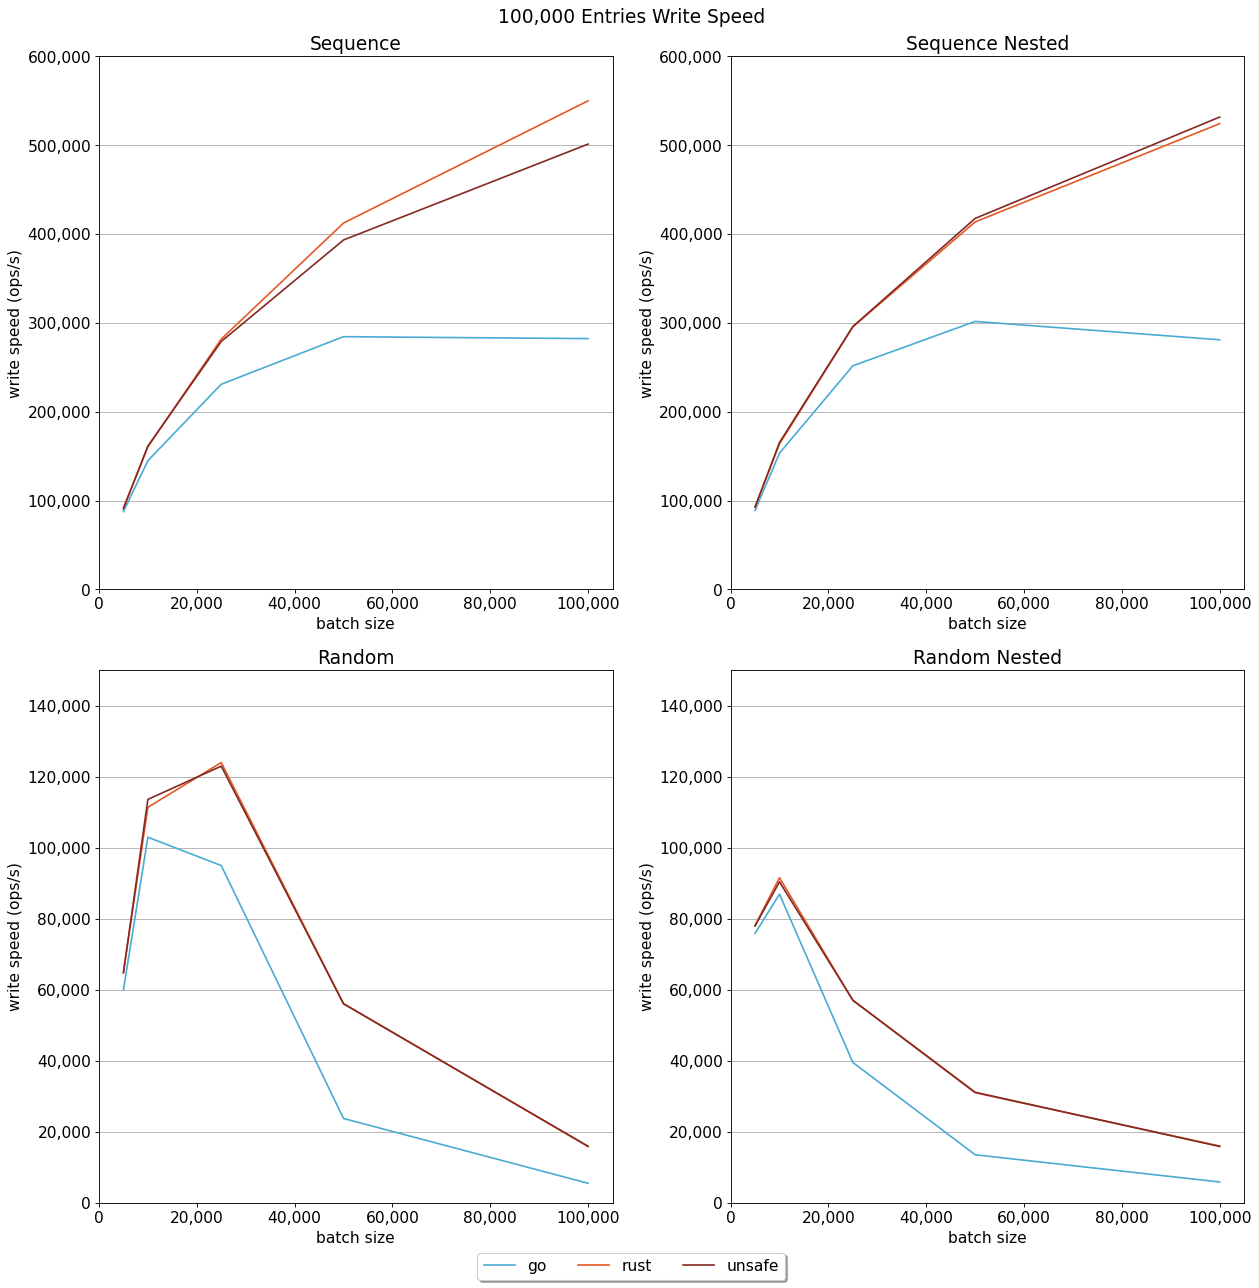

In [ ]:
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16,16), dpi=80)
fig.suptitle('100,000 Entries Write Speed')
ax = fig.add_subplot(221)
grouped=c100k[c100k['write_alg']=='seq'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Sequence')
ax.grid(axis='y')
ax.set_ylim([0,600000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax.xaxis.set_major_formatter(ticks_comma)
ax = fig.add_subplot(222)
grouped=c100k[c100k['write_alg']=='seq-nest'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Sequence Nested')
ax.grid(axis='y')
ax.set_ylim([0,600000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax.xaxis.set_major_formatter(ticks_comma)
ax = fig.add_subplot(223)
grouped=c100k[c100k['write_alg']=='rnd'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Random')
ax.grid(axis='y')
ax.set_ylim([0,150000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax.xaxis.set_major_formatter(ticks_comma)
ax = fig.add_subplot(224)
grouped=c100k[c100k['write_alg']=='rnd-nest'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Random Nested')
ax.grid(axis='y')
ax.set_ylim([0,150000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax.xaxis.set_major_formatter(ticks_comma)
fig.tight_layout()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend(Label) 
fig.legend(lines, labels,loc='lower center', bbox_to_anchor=(0.5, -0.02), fancybox=True, shadow=True, ncols=3)
plt.show()

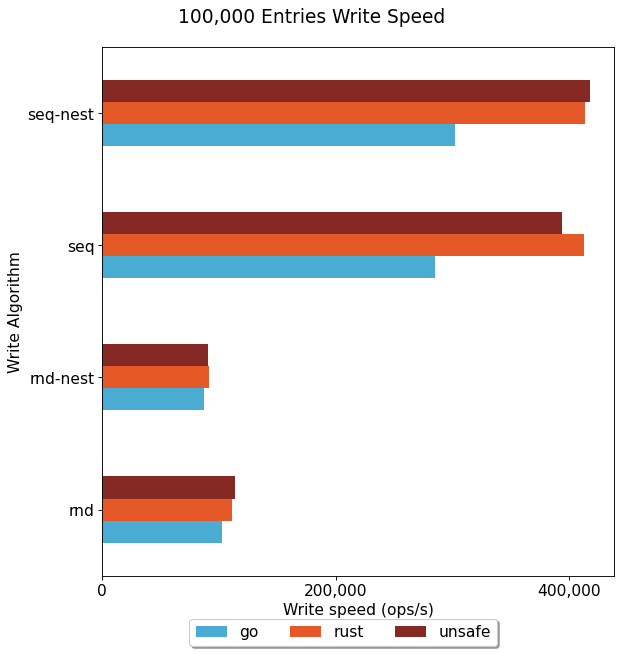

In [ ]:
alg = list()
batch_size = list()
release = list()
go = list()
unsafe = list()

for write_alg in set(c100k['write_alg']):
    g=c100k[c100k['write_alg']==write_alg].groupby(["runtime","batch"])["write_ops/s"].mean()
    maxed=g['go'].idxmax()
    alg.append(write_alg)
    batch_size.append(maxed)
    release.append(g['release'][maxed])
    go.append(g['go'][maxed])
    unsafe.append(g['unsafe'][maxed])

d = {
    'write_alg': alg,
    'go': go,
    'rust': release,
    'unsafe': unsafe
}

df=pd.DataFrame(data=d)
df.sort_values('write_alg',inplace=True)
fig = plt.figure(figsize=(8,8), dpi=80)
fig.suptitle('100,000 Entries Write Speed')
ax = fig.add_subplot(111)
df.plot.barh(x='write_alg',color=BAR_COLORS,ax=ax)
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlabel('Write speed (ops/s)')
ax.set_xticks([0,200000,400000])
ax.set_ylabel('Write Algorithm')
ax.get_legend().remove()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend(Label) 
fig.legend(lines,labels,loc='lower center', bbox_to_anchor=(0.55, -0.03), fancybox=True, shadow=True, ncols=3)
fig.tight_layout()
plt.show()

In [ ]:
d = pd.DataFrame()

for write_alg in set(c100k['write_alg']):
    g=c100k[c100k['write_alg']==write_alg].groupby(["runtime","batch"])["write_ops/s"].mean()
    dr = pd.DataFrame()
    maxed=g['go'].idxmax()
    s = pd.Series([g['release'][maxed],g['go'][maxed]], index=['release','go'])
    dr[write_alg]=s   
    print(write_alg)
    print(s['release']/s['go'])
    print(dr)
    print('\n')

rnd
1.0816803706882825
              rnd
release  111398.8
go       102986.8


rnd-nest
1.0532705723242812
         rnd-nest
release   91586.3
go        86954.2


seq-nest
1.371318603881877
         seq-nest
release  413726.0
go       301699.4


seq
1.449454430954037
              seq
release  412451.1
go       284556.1




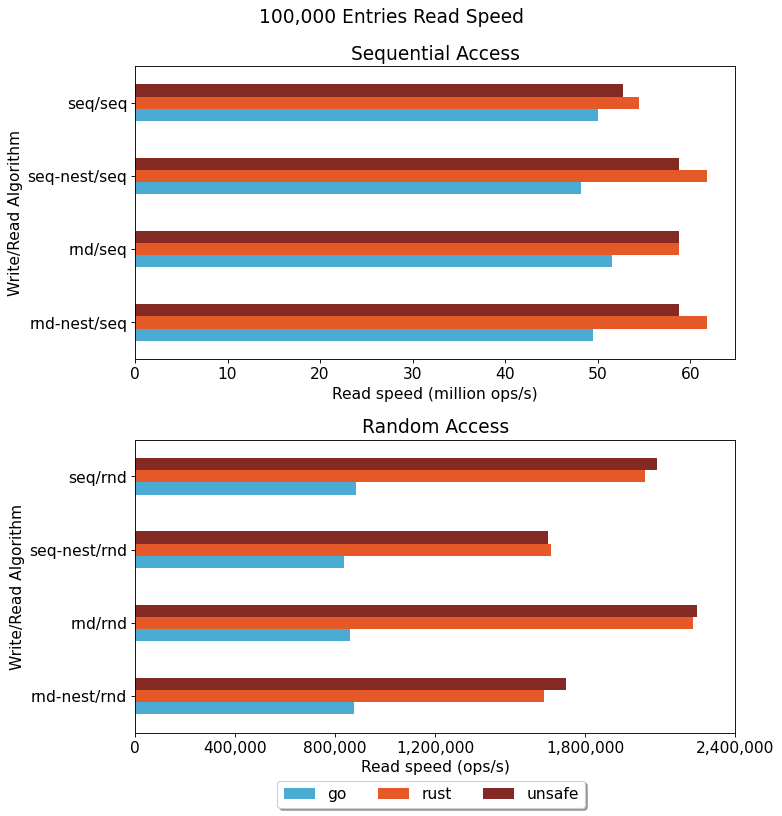

In [ ]:
alg = list()
batch_size = list()
release = list()
go = list()
unsafe = list()

for write_alg in set(c100k['write_alg']):
    for read_alg in set(c100k['read_alg']):
        g=c100k[c100k['write_alg']==write_alg].groupby(["read_alg","runtime","batch"])["read_ops/s"].mean()
        r = maxed=g[read_alg]
        maxed=r['go'].idxmax()
        alg.append(write_alg + '/' + read_alg)
        batch_size.append(maxed)
        release.append(r['release'][maxed])
        go.append(r['go'][maxed])
        unsafe.append(r['unsafe'][maxed])

d = {
    'alg': alg,
    'go': go,
    'rust': release,
    'unsafe': unsafe
}
pd_rnd=pd.DataFrame(data=d)
pd_rnd.sort_values('alg',inplace=True)
fig = plt.figure(figsize=(10,10), dpi=80)
fig.suptitle('100,000 Entries Read Speed')
ax = fig.add_subplot(212)
pd_rnd[pd_rnd['alg'].str.endswith('rnd')].plot(kind='barh',x='alg',color=BAR_COLORS,ax=ax)
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_title('Random Access')
ax.set_xlabel('Read speed (ops/s)')
ax.set_xticks([0,400000,800000,1200000,1800000,2400000])
ax.set_ylabel('Write/Read Algorithm')
ax.get_legend().remove()
ax = fig.add_subplot(211)
pd_rnd[pd_rnd['alg'].str.endswith('seq')].plot(kind='barh',x='alg',color=BAR_COLORS,ax=ax)
ax.xaxis.set_major_formatter(ticks_million)
ax.set_title('Sequential Access')
ax.set_xlabel('Read speed (million ops/s)')
ax.set_ylabel('Write/Read Algorithm')
ax.get_legend().remove()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend(Label) 
fig.legend(lines,labels,loc='lower center', bbox_to_anchor=(0.55, -0.03), fancybox=True, shadow=True, ncols=3)
fig.tight_layout()
plt.show()

In [ ]:
d = pd.DataFrame()

for write_alg in set(c100k['write_alg']):
    g=c100k[c100k['write_alg']==write_alg].groupby(["read_alg","runtime","batch"])["read_ops/s"].mean()
    dr = pd.DataFrame()
    for read_alg in set(c100k['read_alg']):
        r=g[read_alg]
        maxed=r['go'].idxmax()
        s = pd.Series([r['release'][maxed],r['go'][maxed]], index=['release','go'])
        print(s['release']/s['go'])
        dr[read_alg]=s
    print(write_alg)
    print(dr)
    print('\n')

2.60042064836631
1.1404561870580887
rnd
               rnd         seq
release  2231183.8  58823529.0
go        858008.8  51578946.8


1.8689684405172373
1.2471719310025453
rnd-nest
               rnd         seq
release  1634947.8  61764705.0
go        874786.2  49523809.4


1.988043973653243
1.2830617765589416
seq-nest
               rnd         seq
release  1665423.8  61764705.0
go        837719.8  48138527.8


2.3081403528454323
1.08888888
seq
               rnd         seq
release  2040897.4  54444444.0
go        884217.2  50000000.0




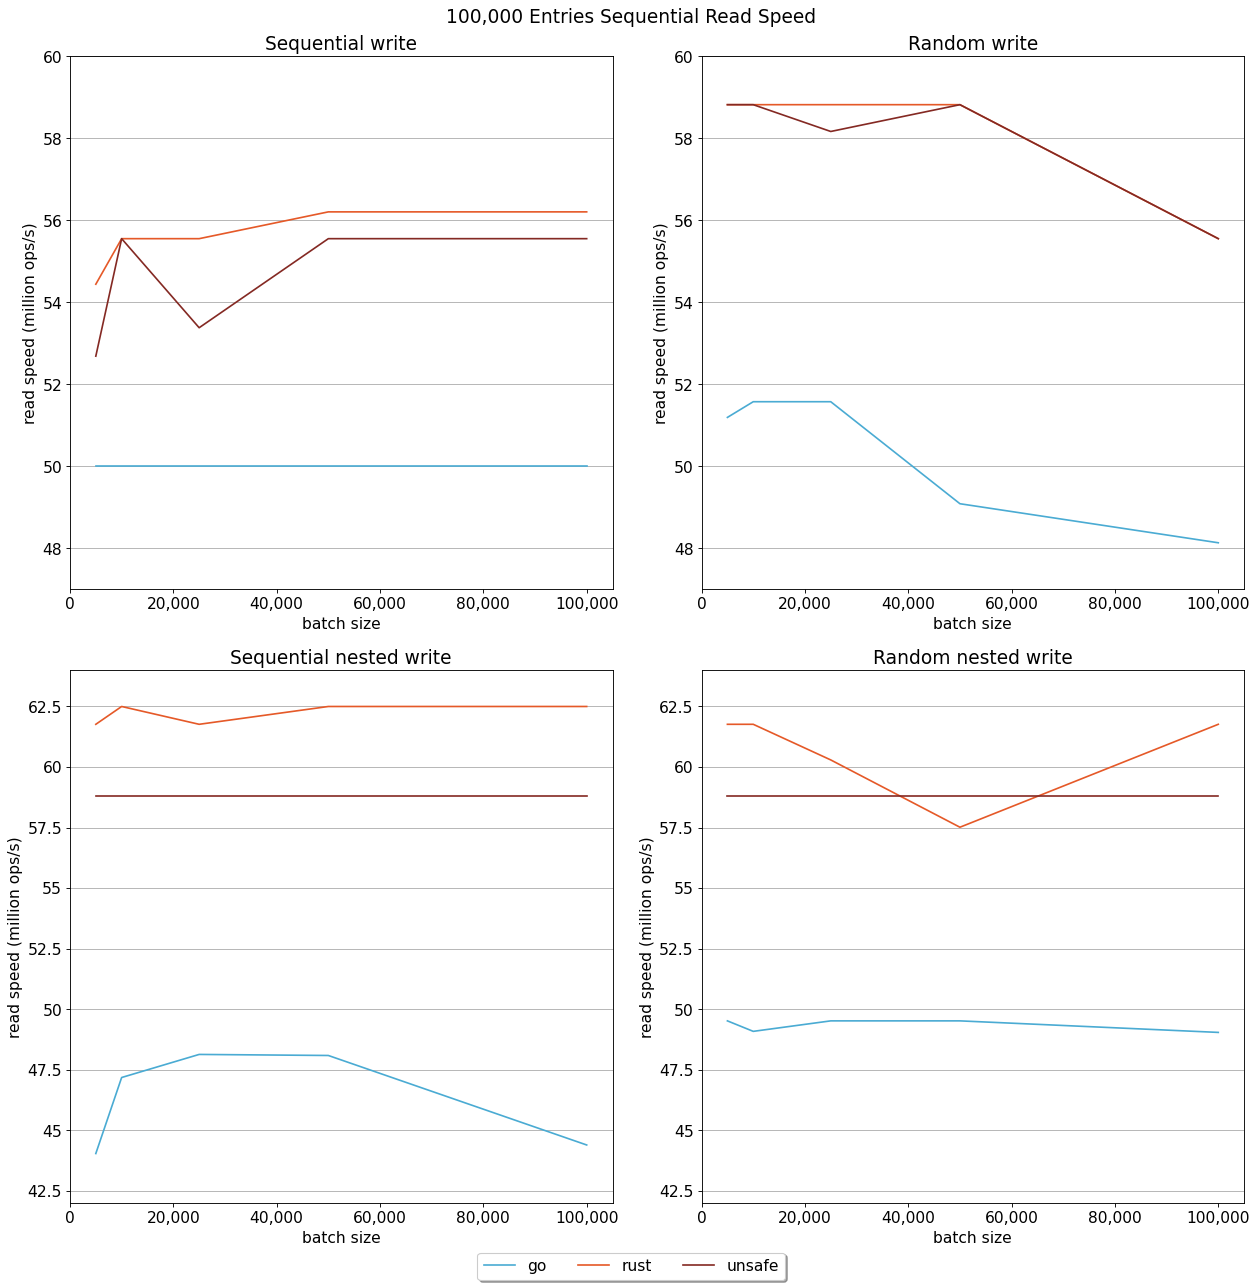

In [ ]:
groups=c100k.groupby(["write_alg","read_alg","runtime","batch"])["read_ops/s"].mean()
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16,16), dpi=80)
fig.suptitle('100,000 Entries Sequential Read Speed')
ax = fig.add_subplot(221)
grouped=groups['seq']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
plt.xlabel('batch size')
plt.title('Sequential write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([47000000,60000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax = fig.add_subplot(222)
grouped=groups['rnd']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Random write')
ax.grid(axis='y') 
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([47000000,60000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax = fig.add_subplot(223)
grouped=groups['seq-nest']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Sequential nested write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([42000000,64000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax = fig.add_subplot(224)
grouped=groups['rnd-nest']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
plt.xlabel('batch size')
plt.title('Random nested write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([42000000,64000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
fig.tight_layout()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend(Label) 
fig.legend(lines, labels,loc='lower center', bbox_to_anchor=(0.5, -0.02), fancybox=True, shadow=True, ncols=3)
plt.show()

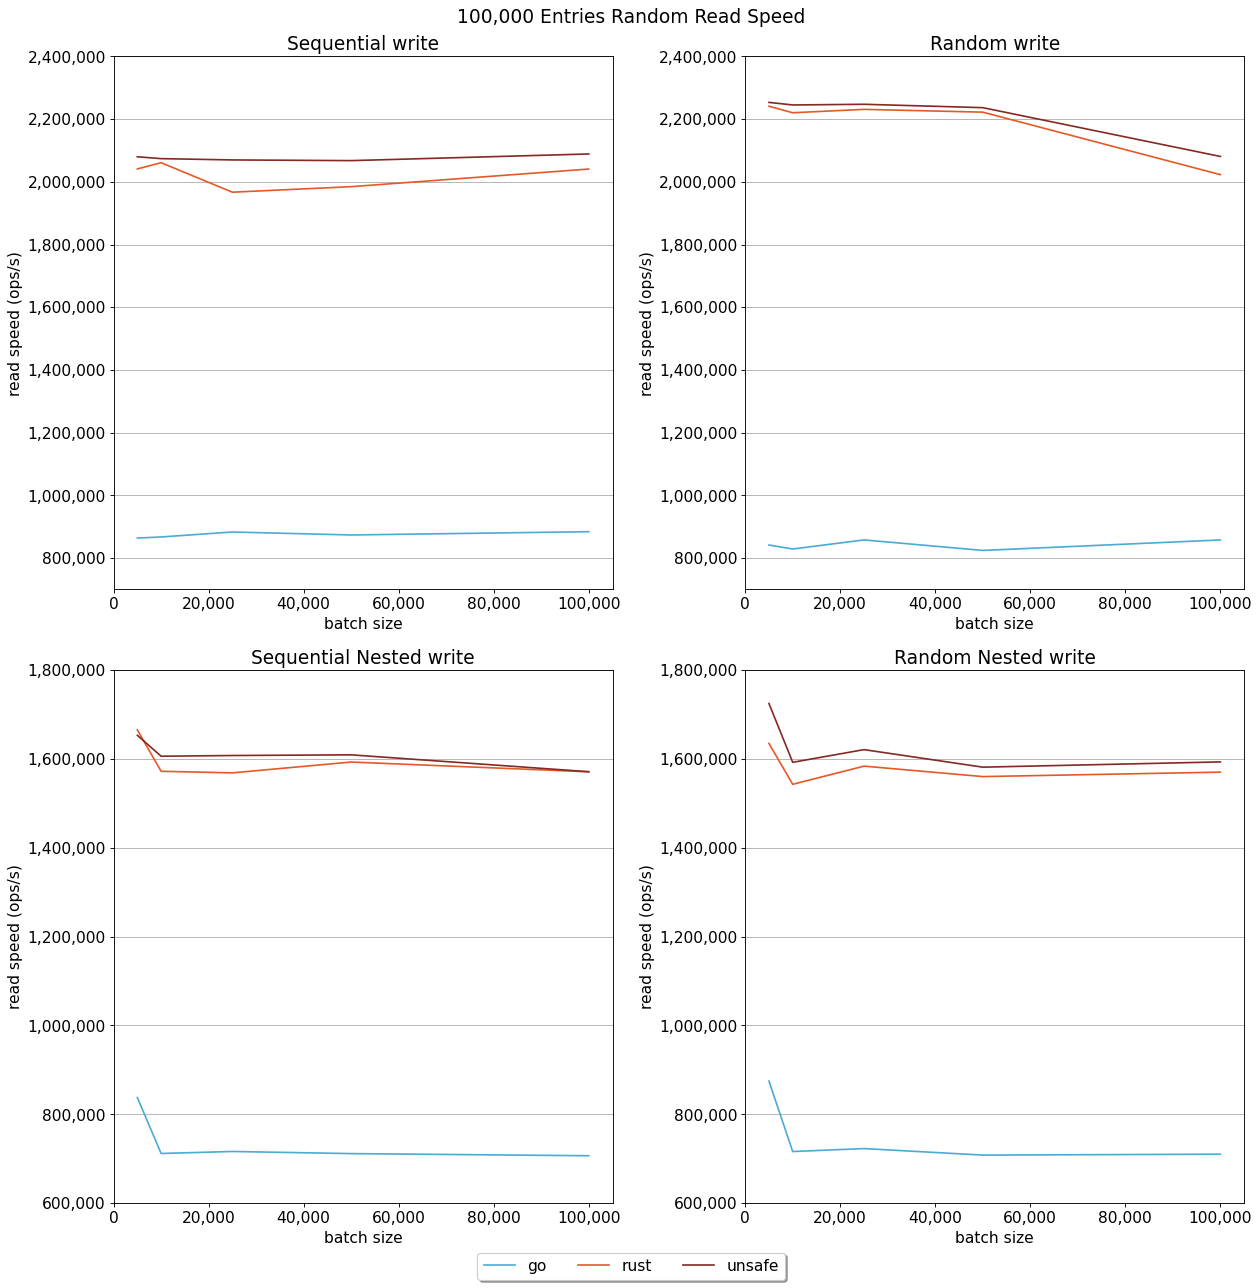

In [ ]:
groups=c100k.groupby(["write_alg","read_alg","runtime","batch"])["read_ops/s"].mean()
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16,16), dpi=80)
fig.suptitle('100,000 Entries Random Read Speed')
ax = fig.add_subplot(221)
grouped=groups['seq']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (ops/s)')
plt.xlabel('batch size')
plt.title('Sequential write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([700000,2400000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax = fig.add_subplot(222)
grouped=groups['rnd']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (ops/s)')
plt.xlabel('batch size')
plt.title('Random write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([700000,2400000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax = fig.add_subplot(223)
grouped=groups['seq-nest']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (ops/s)')
plt.xlabel('batch size')
plt.title('Sequential Nested write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([600000,1800000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
ax = fig.add_subplot(224)
grouped=groups['rnd-nest']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (ops/s)')
plt.xlabel('batch size')
plt.title('Random Nested write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([600000,1800000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,105000])
fig.tight_layout()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend(Label) 
fig.legend(lines, labels,loc='lower center', bbox_to_anchor=(0.5, -0.02), fancybox=True, shadow=True, ncols=3)
plt.show()

In [ ]:
d = pd.DataFrame()

for write_alg in set(c100k['write_alg']):
    g=c100k[c100k['write_alg']==write_alg].groupby(["read_alg","runtime","batch"])["read_ops/s"].mean()
    dr = pd.DataFrame()
    for read_alg in set(c100k['read_alg']):
        r=g[read_alg]
        maxed=r['go'].idxmax()
        print(maxed)
        s = pd.Series([r['release'][maxed],r['go'][maxed]], index=['release','go'])
        dr[read_alg]=s
    print(write_alg)
    print(dr)



25000
10000
rnd
               rnd         seq
release  2231183.8  58823529.0
go        858008.8  51578946.8
5000
5000
rnd-nest
               rnd         seq
release  1634947.8  61764705.0
go        874786.2  49523809.4
5000
25000
seq-nest
               rnd         seq
release  1665423.8  61764705.0
go        837719.8  48138527.8
100000
5000
seq
               rnd         seq
release  2040897.4  54444444.0
go        884217.2  50000000.0


In [ ]:
c1m.groupby(["write_alg","runtime","batch"])["write_ops/s"].mean()

write_alg  runtime  batch 
rnd        go       5000       20286.8
                    10000      30541.1
                    25000      59944.5
                    50000      87536.5
                    100000     45267.0
                    250000      8840.6
           release  5000       22247.1
                    10000      32949.3
                    25000      65174.5
                    50000     115439.4
                    100000     95452.2
                    250000     19870.6
           unsafe   5000       21884.7
                    10000      32982.9
                    25000      65171.4
                    50000     115916.1
                    100000     96241.6
                    250000     19915.0
rnd-nest   go       5000       76120.6
                    10000      88948.9
                    25000      40564.4
                    50000      13845.6
                    100000      6040.6
                    250000      2237.6
           release  5000       77900.

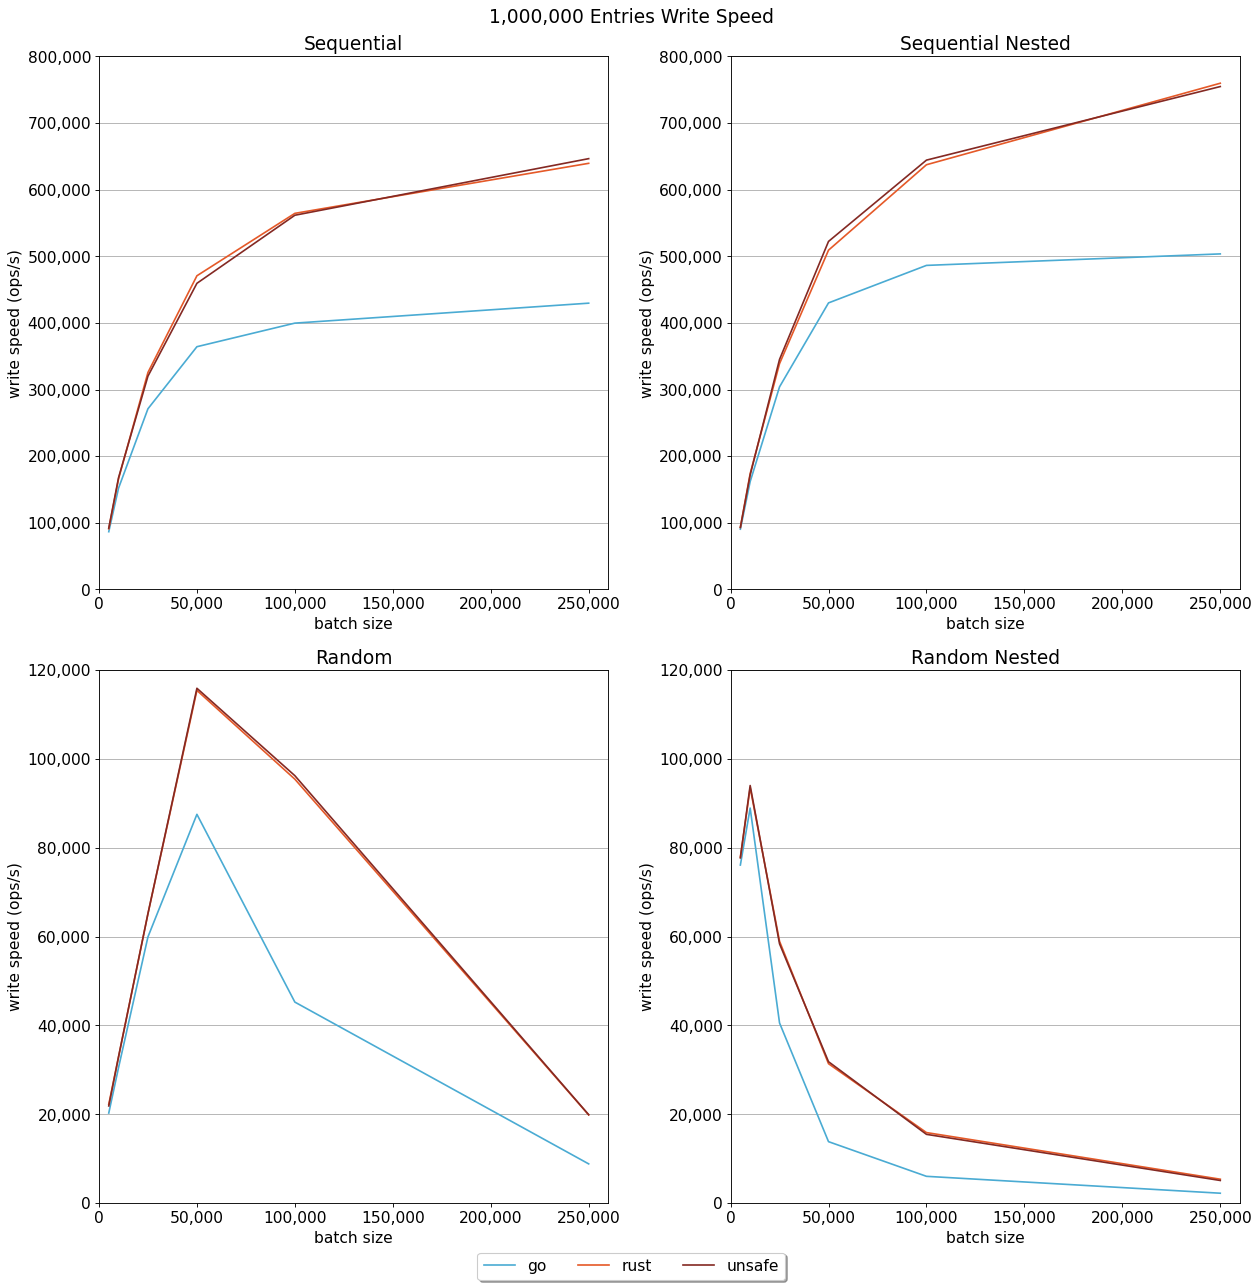

In [ ]:
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16,16), dpi=80)
fig.suptitle('1,000,000 Entries Write Speed')
ax = fig.add_subplot(221)
grouped=c1m[c1m['write_alg']=='seq'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Sequential')
ax.grid(axis='y')
ax.set_ylim([0,800000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax.xaxis.set_major_formatter(ticks_comma)
ax = fig.add_subplot(222)
grouped=c1m[c1m['write_alg']=='seq-nest'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Sequential Nested')
ax.grid(axis='y'); 
ax.set_ylim([0,800000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax.xaxis.set_major_formatter(ticks_comma)
ax = fig.add_subplot(223)
grouped=c1m[c1m['write_alg']=='rnd'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Random')
ax.grid(axis='y');
ax.set_ylim([0,120000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax.xaxis.set_major_formatter(ticks_comma)
ax = fig.add_subplot(224)
grouped=c1m[c1m['write_alg']=='rnd-nest'].groupby(["runtime","batch"])["write_ops/s"].mean()
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('write speed (ops/s)')
plt.xlabel('batch size')
plt.title('Random Nested')
ax.grid(axis='y'); 
ax.set_ylim([0,120000])
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax.xaxis.set_major_formatter(ticks_comma)
fig.tight_layout()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend(Label) 
fig.legend(lines, labels,loc='lower center', bbox_to_anchor=(0.5, -0.02), fancybox=True, shadow=True, ncols=3)
plt.show()

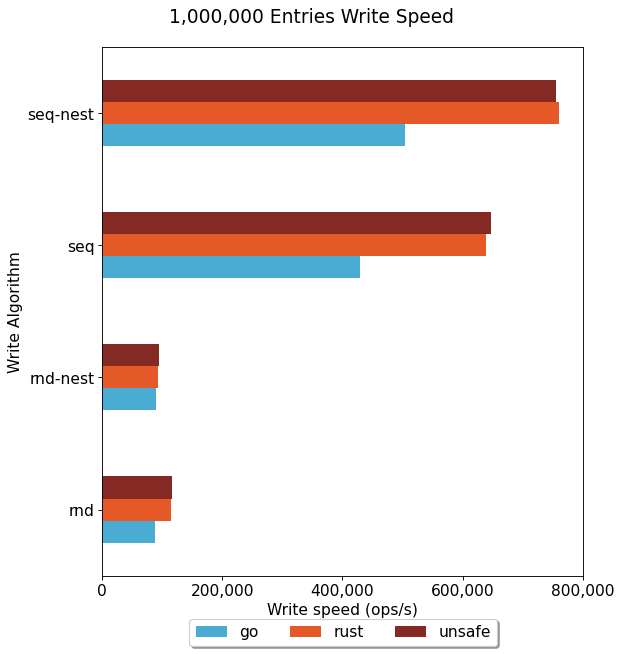

In [ ]:
alg = list()
batch_size = list()
release = list()
go = list()
unsafe = list()

for write_alg in set(c1m['write_alg']):
    g=c1m[c1m['write_alg']==write_alg].groupby(["runtime","batch"])["write_ops/s"].mean()
    maxed=g['go'].idxmax()
    alg.append(write_alg)
    batch_size.append(maxed)
    release.append(g['release'][maxed])
    go.append(g['go'][maxed])
    unsafe.append(g['unsafe'][maxed])

d = {
    'write_alg': alg,
    'go': go,
    'rust': release,
    'unsafe': unsafe
}

df=pd.DataFrame(data=d)
df.sort_values('write_alg',inplace=True)
fig = plt.figure(figsize=(8,8), dpi=80)
fig.suptitle('1,000,000 Entries Write Speed')
ax = fig.add_subplot(111)
df.plot.barh(x='write_alg',color=BAR_COLORS,ax=ax)
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlabel('Write speed (ops/s)')
ax.set_xticks([0,200000,400000,600000,800000])
ax.set_ylabel('Write Algorithm')
ax.get_legend().remove()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend(Label) 
fig.legend(lines,labels,loc='lower center', bbox_to_anchor=(0.55, -0.03), fancybox=True, shadow=True, ncols=3)
fig.tight_layout()
plt.show()

In [ ]:
d = pd.DataFrame()

for write_alg in set(c1m['write_alg']):
    g=c1m[c1m['write_alg']==write_alg].groupby(["runtime","batch"])["write_ops/s"].mean()
    dr = pd.DataFrame()
    maxed=g['go'].idxmax()
    s = pd.Series([g['release'][maxed],g['go'][maxed]], index=['release','go'])
    dr[write_alg]=s   
    print(write_alg)
    print(s['release']/s['go'])
    print(dr)
    print('\n')

rnd
1.3187573183757633
              rnd
release  115439.4
go        87536.5


rnd-nest
1.0515284618471956
         rnd-nest
release   93532.3
go        88948.9


seq-nest
1.5086530803671505
         seq-nest
release  759802.8
go       503629.9


seq
1.4884969489348037
              seq
release  639586.3
go       429686.0




In [ ]:
c1m.groupby(["write_alg","read_alg","runtime","batch"])["read_ops/s"].mean()

write_alg  read_alg  runtime  batch 
rnd        rnd       go       5000        613588.4
                              10000       650055.6
                              25000       678382.8
                              50000       679025.0
                              100000      645997.8
                              250000      653863.0
                     release  5000       1147609.8
                              10000      1139221.6
                              25000      1157420.8
                              50000      1165796.8
                              100000     1161189.6
                              250000     1169617.8
                     unsafe   5000       1148688.6
                              10000      1138074.6
                              25000      1159254.0
                              50000      1175679.2
                              100000     1166933.8
                              250000     1162609.2
           seq       go       5000      50000

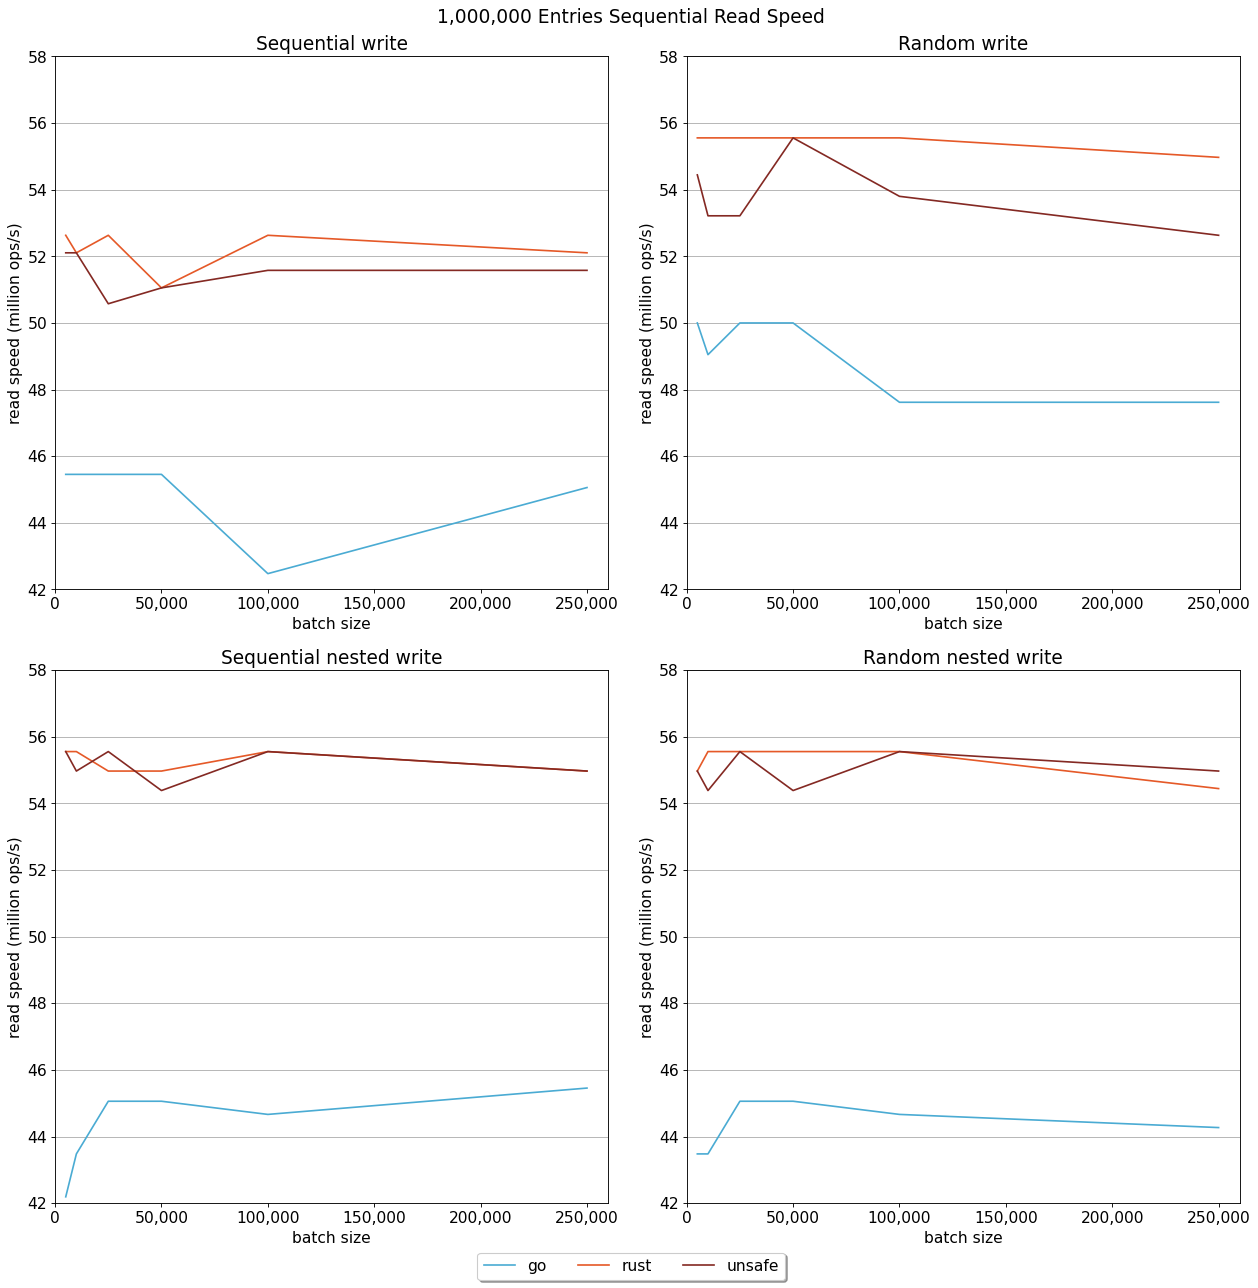

In [ ]:
groups=c1m.groupby(["write_alg","read_alg","runtime","batch"])["read_ops/s"].mean()
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16,16), dpi=80)
fig.suptitle('1,000,000 Entries Sequential Read Speed')
ax = fig.add_subplot(221)
grouped=groups['seq']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Sequential write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([42000000,58000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax = fig.add_subplot(222)
grouped=groups['rnd']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Random write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([42000000,58000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax = fig.add_subplot(223)
grouped=groups['seq-nest']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
plt.xlabel('batch size')
plt.title('Sequential nested write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([42000000,58000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax = fig.add_subplot(224)
grouped=groups['rnd-nest']['seq']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (million ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Random nested write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_million)
ax.set_ylim([42000000,58000000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
fig.tight_layout()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend(Label) 
fig.legend(lines, labels,loc='lower center', bbox_to_anchor=(0.5, -0.02), fancybox=True, shadow=True, ncols=3)
plt.show()

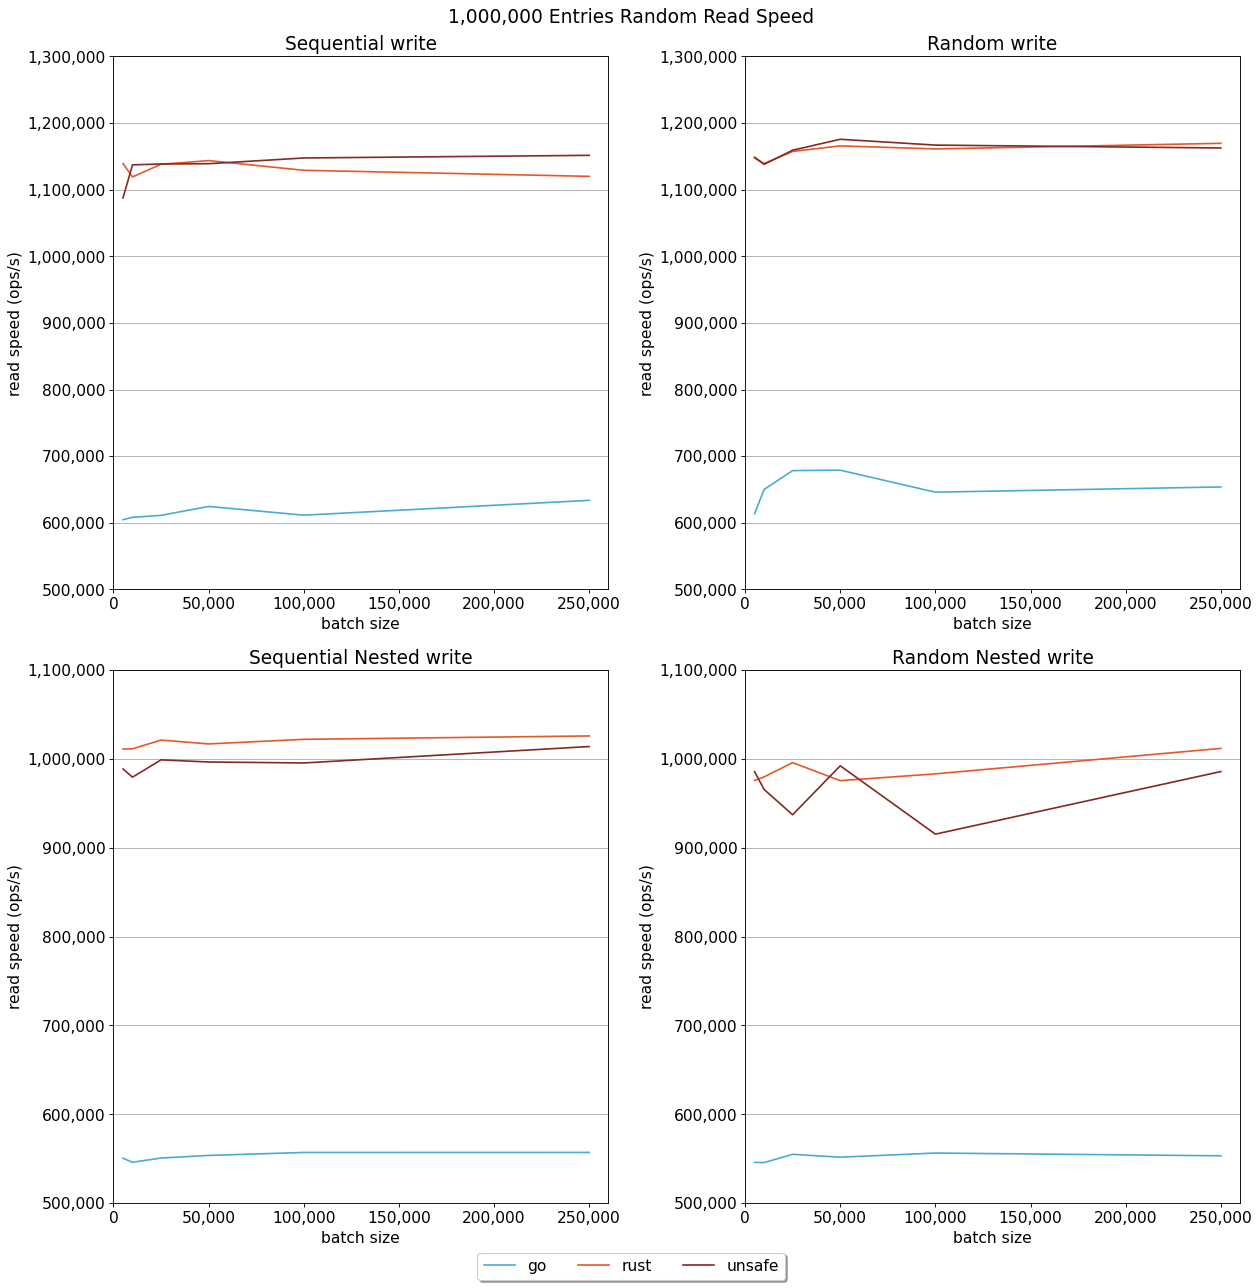

In [ ]:
groups=c1m.groupby(["write_alg","read_alg","runtime","batch"])["read_ops/s"].mean()
plt.rcParams["font.size"] = "14"
fig = plt.figure(figsize=(16,16), dpi=80)
fig.suptitle('1,000,000 Entries Random Read Speed')
ax = fig.add_subplot(221)
grouped=groups['seq']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Sequential write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([500000,1300000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax = fig.add_subplot(222)
grouped=groups['rnd']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Random write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([500000,1300000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax = fig.add_subplot(223)
grouped=groups['seq-nest']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Sequential Nested write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([500000,1100000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
ax = fig.add_subplot(224)
grouped=groups['rnd-nest']['rnd']
grouped['go'].plot(label='go',color=COLOR_GO)
grouped['release'].plot(label='rust',color=COLOR_RUST)
grouped['unsafe'].plot(label='unsafe',color=COLOR_UNSAFE)
plt.ylabel('read speed (ops/s)')
ax.ticklabel_format(axis='y', style='plain')
plt.xlabel('batch size')
plt.title('Random Nested write')
ax.grid(axis='y')
ax.yaxis.set_major_formatter(ticks_comma)
ax.set_ylim([500000,1100000])
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_xlim([0,260000])
fig.tight_layout()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend(Label) 
fig.legend(lines, labels,loc='lower center', bbox_to_anchor=(0.5, -0.02), fancybox=True, shadow=True, ncols=3)
plt.show()

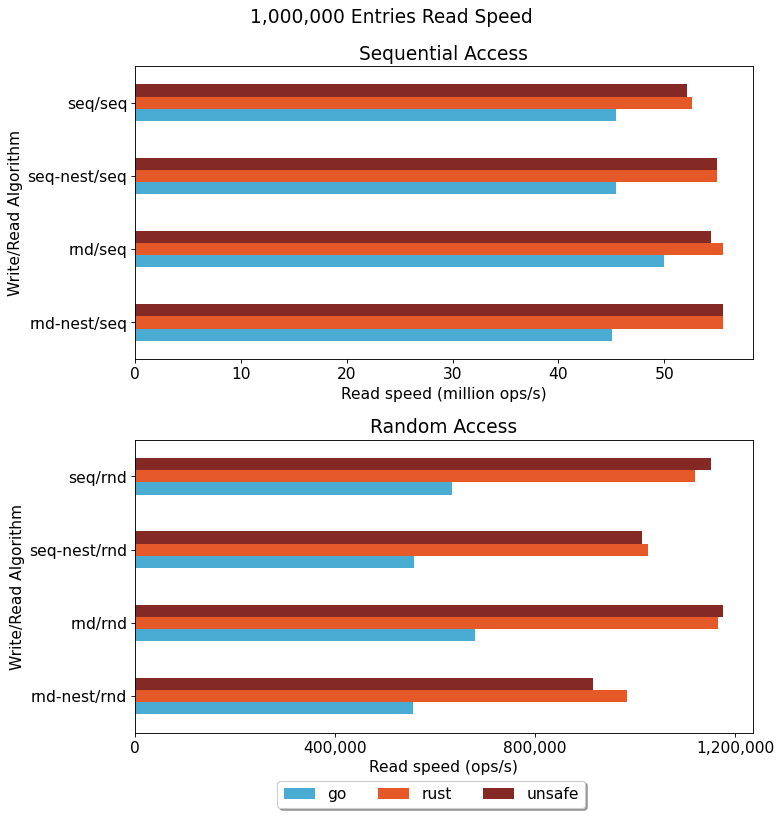

In [ ]:
alg = list()
batch_size = list()
release = list()
go = list()
unsafe = list()

for write_alg in set(c1m['write_alg']):
    for read_alg in set(c1m['read_alg']):
        g=c1m[c1m['write_alg']==write_alg].groupby(["read_alg","runtime","batch"])["read_ops/s"].mean()
        r = maxed=g[read_alg]
        maxed=r['go'].idxmax()
        alg.append(write_alg + '/' + read_alg)
        batch_size.append(maxed)
        release.append(r['release'][maxed])
        go.append(r['go'][maxed])
        unsafe.append(r['unsafe'][maxed])

d = {
    'alg': alg,
    'go': go,
    'rust': release,
    'unsafe': unsafe
}
pd_rnd=pd.DataFrame(data=d)
pd_rnd.sort_values('alg',inplace=True)
fig = plt.figure(figsize=(10,10), dpi=80)
fig.suptitle('1,000,000 Entries Read Speed')
ax = fig.add_subplot(212)
pd_rnd[pd_rnd['alg'].str.endswith('rnd')].plot(kind='barh',x='alg',color=BAR_COLORS,ax=ax)
ax.xaxis.set_major_formatter(ticks_comma)
ax.set_title('Random Access')
ax.set_xlabel('Read speed (ops/s)')
ax.set_xticks([0,400000,800000,1200000])
ax.set_ylabel('Write/Read Algorithm')
ax.get_legend().remove()
ax = fig.add_subplot(211)
pd_rnd[pd_rnd['alg'].str.endswith('seq')].plot(kind='barh',x='alg',color=BAR_COLORS,ax=ax)
ax.xaxis.set_major_formatter(ticks_million)
ax.set_title('Sequential Access')
ax.set_xlabel('Read speed (million ops/s)')
ax.set_ylabel('Write/Read Algorithm')
ax.get_legend().remove()
lines = [] 
labels = [] 
Line, Label = ax.get_legend_handles_labels() 
lines.extend(Line) 
labels.extend(Label) 
fig.legend(lines,labels,loc='lower center', bbox_to_anchor=(0.55, -0.03), fancybox=True, shadow=True, ncols=3)
fig.tight_layout()
plt.show()

In [ ]:
d = pd.DataFrame()

for write_alg in set(c1m['write_alg']):
    g=c1m[c1m['write_alg']==write_alg].groupby(["read_alg","runtime","batch"])["read_ops/s"].mean()
    dr = pd.DataFrame()
    for read_alg in set(c1m['read_alg']):
        r=g[read_alg]
        maxed=r['go'].idxmax()
        s = pd.Series([r['release'][maxed],r['go'][maxed]], index=['release','go'])
        print(s['release']/s['go'])
        dr[read_alg]=s
    print(write_alg)
    print(dr)
    print('\n')

1.7168687456279224
1.1111111
rnd
               rnd         seq
release  1165796.8  55555555.0
go        679025.0  50000000.0


1.767122361971338
1.2329434721649397
rnd-nest
              rnd         seq
release  983244.2  55555555.0
go       556409.8  45059288.0


1.8415694924466723
1.2093567232935674
seq-nest
               rnd         seq
release  1025924.0  54970759.6
go        557092.2  45454545.0


1.767344358688874
1.1578947275789473
seq
               rnd         seq
release  1120035.4  52631578.0
go        633739.2  45454545.0


